# Proyecto curso Python para el analisis de datos.

## Samuel Emmanuel Silva Aguinaga.

- Tema a escoger: [Viajes de Taxi en NYC](https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc)

![Taxis](https://assets3.thrillist.com/v1/image/1438473/1200x600/scale;;webp=auto;jpeg_quality=85.jpg)

A lo largo del analisis de estos datos, se observaran y estudiaran los viajes realizados a lo largo de los dias de los años 2009 y 2021; conocer a los dos proveedores de los servicios de taxis amarillos en New York, asi mismo su duracion, costo y distancia recorrida en millas, cantidad de pasajeros y cual de ellos tiene una mejor posicion en el mercado deacuerdo a sus servicios.

La información proporcionada por el conjunto de datos permite mejorar el control y la supervisión, analizar áreas de mejora y comparar tarifas de los proveedores. Esto facilita identificar las áreas de mayor demanda y establecer tarifas que beneficien a ambas partes.

Aunque el conjunto de datos no proporciona áreas geográficas específicas definidas por longitud y latitud, las zonas en las que operan los proveedores se identificarán mediante un ID. Con esta información, será posible determinar la ubicación de cada proveedor y las áreas con mayor recogida y descenso de pasajeros.

Analizar el tipo de pago mas comun y/o preferido por los clientes, asi se podra saber que cantidad de efectivo es recomendable que el conductor maneje para evitar un robo; poder tener promociones por uso de tarjeta tambien puede ser mas comodo y atractivo a los clientes.

El código de tarifa final en efecto al final del viaje se representa con un valor numérico que indica el tipo de tarifa aplicada. Los valores son los siguientes: 1 para tarifa estándar, 2 para JFK, 3 para Newark, 4 para Nassau o Westchester, 5 para tarifa negociada, y 6 para viaje grupal. Este código permite identificar de manera precisa la estructura tarifaria utilizada al concluir cada trayecto.

Por efectos de obtener un mejor control sobre los viajes, generalmente el taximetro necesita conexion a servidores, y es por ello que en algunos datos del dataset podemos obtener el no almacenamiento de la distancia de algunos viajes, asi mismo, el no oportuno calculo de algunos impuestos como MTA o
recargo por mejora.

Es bien sabido que en ciudades grandes y congestionadas el uso de peajes es comun cada vez mas, es por ello que este dataset tambien toma en cuenta los peajes usados y su costo total para el total a pagar del pasajero, asi mismo si la recogida del pasajero se efectua en el aeropuerto.

![Airport](https://www.directoriocubano.info/wp-content/uploads/2023/12/sube-el-precio-del-peaje-en-nueva-york-cuanto-y-qu-scaled.jpg)

## Numero de observaciones y atributos.

- 83691 Filas u Observaciones.
- 20 Columnas o Atributos.

## Contiene atributos geográficos o temporales?

- El conjunto de datos no contiene información geográfica puntual como longitud y latitud. Sin embargo, incluye ID's (PULocationID y DOLocationID) que permiten identificar los puntos específicos donde los taxistas de cualquiera de los proveedores se encontraban al recoger y dejar a los pasajeros.

- Como atributos temporales, el conjunto de datos proporciona una amplia gama de información, incluyendo la fecha exacta y hora de cada recogida y entrega de pasajeros, la distancia recorrida en millas, el costo total del viaje, el método de pago y más.

## ¿Qué preguntas le gustaría responder durante el análisis?

- De todos los viajes realizados, cual es el que tiene la mayor duracion?

- Que distancia recorrida por los taxis es la media, por vendor ID?

- Que proveedor realizo mas viajes?

- Cual es el valor total en propinas?

- Que tipo de pago es el mas utilizado?

- Cual es la media de pasajeros por viaje?

## ¿Qué tipos de visualización o análisis le gustaría generar?

- Gráficos de barras.
- Pies

### Importando librerias necesarias para el EDA (Exploratory Data Analysis)
#### - Pandas para manipulacion y analisis de datos, uso de dataframes y series.
#### - Numpy para calculos matematicos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Ingreso de datos de excel tipo CSV.
##### - Uso de la libreria de pandas, el read_csv para poder leer el formato mismo de excel; asi mismo uso de shape para conocer el numero de columnas y filas contenidas en el archivo a analizar.

In [2]:
taxi_data = pd.read_csv("taxi_tripdata.csv")
taxi_data.shape

C:\Users\samue\AppData\Local\Temp\ipykernel_27452\436204291.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_data = pd.read_csv("taxi_tripdata.csv")


(83691, 20)

##### - Observamos que contiene 20 Columnas y 83,691 filas.
##### - En la columna numero 3, hay datos de tipos distintos, para arreglar esto, vamos a establecer que los datos de esta columna van a ser tipo string.

In [3]:
column_types = {3: "str"}
taxi_data = pd.read_csv("taxi_tripdata.csv", dtype=column_types)

##### - Describe, asi obtendremos una vista general de la cantidad de datos por columnas, su valor medio, minimo, maximo.

In [4]:
taxi_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


##### - Uso de head para conocer los valores de las primeras cinco filas.

In [5]:
taxi_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,7/1/2021 0:30,7/1/2021 0:35,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,7/1/2021 0:25,7/1/2021 1:01,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,7/1/2021 0:05,7/1/2021 0:12,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,7/1/2021 0:41,7/1/2021 0:47,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,7/1/2021 0:51,7/1/2021 0:58,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


##### - Uso de tail para conocer los valores de las ultimas cinco filas.

In [6]:
taxi_data.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
83686,NaN,7/2/2021 7:59,7/2/2021 8:33,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,7/2/2021 7:02,7/2/2021 7:18,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,7/2/2021 7:53,7/2/2021 8:15,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,7/2/2021 7:58,7/2/2021 8:30,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN
83690,NaN,7/2/2021 7:00,7/2/2021 7:26,NaN,NaN,218,196,NaN,11.32,45.84,2.75,0.0,0.00,0.00,NaN,0.3,48.89,NaN,NaN,NaN


##### - uso de .dtypes para conocer el tipo de datos que utilizaremos y saber si hay que cambiar alguno por efecto de la EDA.

##### - Aseguramos que el tipo de dato en la columna 3 este correcto, siendo object conocido en este notebook, o string generalmente.

In [7]:
taxi_data.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

##### - En la columna payment_type, se debe reemplazar el NaN por el numero 6, ya que este significa que el viaje fue anulado; asi mismo cambiar de float a int, ya que son numeros enteros.

In [8]:
taxi_data["payment_type"] = taxi_data["payment_type"].fillna(6)
taxi_data["payment_type"] = taxi_data["payment_type"].astype(int)
taxi_data["payment_type"].tail()

83686    6
83687    6
83688    6
83689    6
83690    6
Name: payment_type, dtype: int32

##### - Columna numero 0,4,7 deben ser especificados a int para una mejora en el manejo de valores.

##### - Valor cambiado de NaN a 3 en la columna 0, aunque por el diccionario provisto no aparece nada, el 3 va a significar que el proveedor no especifica la compañia, por efectos de un mejor analisis de los datos.

In [9]:
taxi_data["VendorID"] = taxi_data["VendorID"].fillna(3)
taxi_data["VendorID"] = taxi_data["VendorID"].astype(int)
taxi_data["VendorID"].tail()

83686    3
83687    3
83688    3
83689    3
83690    3
Name: VendorID, dtype: int32

##### - Valor cambiado de NaN a 6 en la columna 4, el valor significaria que el viaje fue realizado en grupo.

In [10]:
taxi_data["RatecodeID"] = taxi_data["RatecodeID"].fillna(6)
taxi_data["RatecodeID"] = taxi_data["RatecodeID"].astype(int)
taxi_data["RatecodeID"].tail()


83686    6
83687    6
83688    6
83689    6
83690    6
Name: RatecodeID, dtype: int32

##### - Valor cambiado de NaN y 0 a 1 en la columna 7, ya que 1 es el minimo de pasajeros necesarios para poder realizar un viaje en taxi.

In [11]:
taxi_data["passenger_count"] = taxi_data["passenger_count"].replace(0, 1)
taxi_data["passenger_count"] = taxi_data["passenger_count"].fillna(1)
taxi_data["passenger_count"] = taxi_data["passenger_count"].astype(int)
taxi_data["passenger_count"]

0        1
1        2
2        1
3        1
4        1
        ..
83686    1
83687    1
83688    1
83689    1
83690    1
Name: passenger_count, Length: 83691, dtype: int32

##### - Columnas 1 y 2 deben ser convertidas a formato datetime.

##### - Primero renombramos las dos columnas a un nombre un poco mas facil de manejar y recordar.

In [12]:
taxi_data = taxi_data.rename(columns={"lpep_pickup_datetime": "pickup_datetime"})
taxi_data = taxi_data.rename(columns={"lpep_dropoff_datetime": "dropoff_datetime"})
taxi_data.head()

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,7/1/2021 0:30,7/1/2021 0:35,N,1,74,168,1,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0,0.0
1,2,7/1/2021 0:25,7/1/2021 1:01,N,1,116,265,2,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2,1.0,0.0
2,2,7/1/2021 0:05,7/1/2021 0:12,N,1,97,33,1,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1,1.0,0.0
3,2,7/1/2021 0:41,7/1/2021 0:47,N,1,74,42,1,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0,0.0
4,2,7/1/2021 0:51,7/1/2021 0:58,N,1,42,244,1,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0,0.0


##### - Convertimos ambas columnas a formato de fechas para un mejor manejo.

In [13]:
taxi_data["pickup_datetime"] = pd.to_datetime(taxi_data["pickup_datetime"])
taxi_data["pickup_datetime"]

0       2021-07-01 00:30:00
1       2021-07-01 00:25:00
2       2021-07-01 00:05:00
3       2021-07-01 00:41:00
4       2021-07-01 00:51:00
                ...        
83686   2021-07-02 07:59:00
83687   2021-07-02 07:02:00
83688   2021-07-02 07:53:00
83689   2021-07-02 07:58:00
83690   2021-07-02 07:00:00
Name: pickup_datetime, Length: 83691, dtype: datetime64[ns]

In [14]:
taxi_data["dropoff_datetime"] = pd.to_datetime(taxi_data["dropoff_datetime"])
taxi_data["dropoff_datetime"]

0       2021-07-01 00:35:00
1       2021-07-01 01:01:00
2       2021-07-01 00:12:00
3       2021-07-01 00:47:00
4       2021-07-01 00:58:00
                ...        
83686   2021-07-02 08:33:00
83687   2021-07-02 07:18:00
83688   2021-07-02 08:15:00
83689   2021-07-02 08:30:00
83690   2021-07-02 07:26:00
Name: dropoff_datetime, Length: 83691, dtype: datetime64[ns]

In [15]:
taxi_data.head()

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2021-07-01 00:30:00,2021-07-01 00:35:00,N,1,74,168,1,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0,0.0
1,2,2021-07-01 00:25:00,2021-07-01 01:01:00,N,1,116,265,2,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2,1.0,0.0
2,2,2021-07-01 00:05:00,2021-07-01 00:12:00,N,1,97,33,1,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1,1.0,0.0
3,2,2021-07-01 00:41:00,2021-07-01 00:47:00,N,1,74,42,1,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0,0.0
4,2,2021-07-01 00:51:00,2021-07-01 00:58:00,N,1,42,244,1,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0,0.0


### Analisis semantico.

#### - 1. Que distancia recorrida por los taxis es la media, por vendor ID?

In [16]:
media_trip_distance = taxi_data[["trip_distance", "VendorID"]].groupby("VendorID").mean()
media_trip_distance

,trip_distance
VendorID,
1,2.585142
2,3.653278
3,494.708409


##### Como observacion luego de calcular esta media, podemos ver que para el numero 3, recordando que para efectos de un mejor analisis, el 3 significa que el proveedor no especifica la compañia; estos valores son demasiados altos.

##### para mantener un buen analisis del EDA, estos valores mayor de 100, se reemplazaran por la media de los valores del VendorID.

In [17]:
valor = taxi_data.loc[58348, "trip_distance"]
valor

22164.62

##### Debemos filtrar la informacion, los vendorID que sean 3, y que sus valores en trip distance sean mayor a 100, y luego conocer que indices son los que contienen estos parametros dados.

In [18]:
filtro = (taxi_data["VendorID"] == 3) & (taxi_data["trip_distance"]>100)
filtro_indices = taxi_data[filtro].index
filtro_indices

Index([51195, 51531, 51541, 51572, 51858, 52165, 52176, 52332, 52494, 52949,
       ...
       82787, 82950, 82976, 83170, 83206, 83256, 83274, 83354, 83449, 83602],
      dtype='int64', length=227)

##### Para un mejor manejo de datos, almacenamos en una variable los valores de la media para el 1 y 2 sacados anteriormente, esto con el fin de luego reemplazar los valores mayores a 100 en los valores 3 del VendorID

In [19]:
media_vendorID1 = media_trip_distance.loc[1, "trip_distance"]
media_vendorID2 = media_trip_distance.loc[2, "trip_distance"]

##### Luego iteramos en cada indice y reemplazamos valores de forma random

In [20]:
for index in filtro_indices:
    taxi_data.loc[index,"trip_distance"] = np.random.choice([media_vendorID1, media_vendorID2])

##### Luego de ser reemplazados, volvemos a sacar las medias y podemos ver una diferencia de media en el valor numero 3 de la columna VendorID

##### - 1 = Creative Mobile Technologies, LLC. - 2 = VeriFone INC. - 3. No specific.


In [21]:
media_trip_distance = taxi_data[["trip_distance", "VendorID"]].groupby("VendorID").mean()
media_trip_distance

,trip_distance
VendorID,
1,2.585142
2,3.653278
3,6.711467


##### - Visualizacion del dato por medio de un grafico de barras.

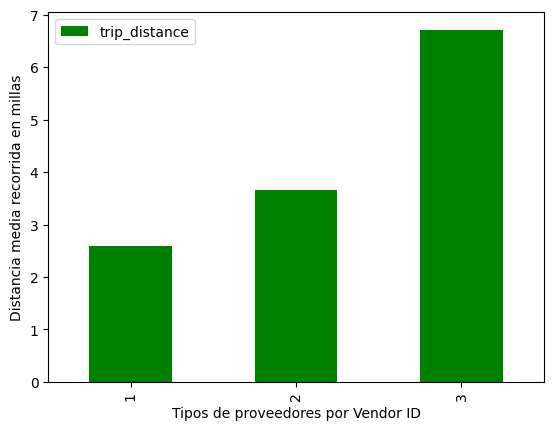

In [22]:
media_trip_distance.plot.bar(color="green")

plt.xlabel("Tipos de proveedores por Vendor ID");

plt.ylabel("Distancia media recorrida en millas");

##### - El numero 3, osea, no especifico fue el que realizo una mayor distancia en millas en promedio.

#### 2. Que tipo de pago es el mas utilizado?

##### Tener en cuenta que para tipo de pagos nada mas, por tarjeta de credito y cash, obviando los 4 otros tipos, sin cargo, disputa, desconocido, y viaje anulado.

##### Numero 1 es tarjeta de credito o debito, y numero 2 seria cash.

In [23]:
payment = (taxi_data["payment_type"] == 1) | (taxi_data["payment_type"] == 2)
used_payment_count = taxi_data[payment]["payment_type"].value_counts()
most_used_payment = used_payment_count.idxmax()
print ("El tipo de pago mas usado es el:", most_used_payment)

El tipo de pago mas usado es el: 1


##### - Realizando una grafica de barras para representar que tipo de pago fue el mas usado por los pasajeros.

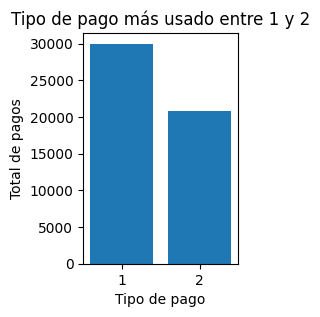

In [38]:
plt.figure(figsize=(2, 3))
plt.bar(used_payment_count.index, used_payment_count.values)
plt.title('Tipo de pago más usado entre 1 y 2')
plt.xlabel('Tipo de pago')
plt.ylabel('Total de pagos')
plt.show()

#### 3. Cual es el valor total en propinas?

##### Tener en cuenta que la contabilizacion de las propinas son en base a las tarjetas de credito o debito, el cash no se toma en cuenta.

##### El dataframe contiene valores negativos, asi que estos seran obviados.

In [25]:
no_neg_amount = taxi_data["tip_amount"] > 0
total_tip = taxi_data[no_neg_amount]["tip_amount"].sum()
print(f"El valor total en propinas es de: ${round(total_tip, 2)} dolares")

El valor total en propinas es de: $88607.55 dolares


#### 4. Cual es la media de pasajeros por viaje?

##### - Esta media significa que la cantidad promedio de pasajeros por cada viaje es de una persona, es mas comun que en New York las personas viajen solas.

In [26]:
media_pasajeros_viaje = taxi_data["passenger_count"].mean()
print(f"La media de pasajeros por cada viaje es de: {round(media_pasajeros_viaje, 2)} pasajeros")

La media de pasajeros por cada viaje es de: 1.19 pasajeros


#### 5. Que proveedor realizo mas viajes?

##### - 1 = Creative Mobile Technologies, LLC.
##### - 2 = VeriFone INC.
##### - 3 = No especifico.

In [27]:
vendor_counts = taxi_data.VendorID.value_counts()
vendor_counts.reindex([1,2,3])

VendorID
1     7619
2    43554
3    32518
Name: count, dtype: int64

##### - Grafica de pie para representar y valorar el total de viajes realizados por el tipo de proveedor por su VendorID.

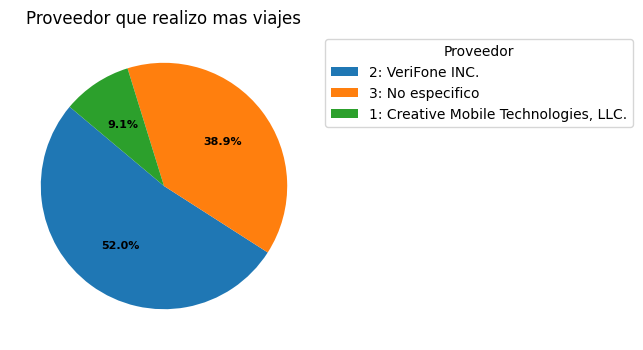

In [28]:
plt.figure(figsize=(4,4))
wedges, texts, autotexts = plt.pie(vendor_counts, autopct='%1.1f%%', startangle=140)
plt.legend(wedges, ["2: VeriFone INC.",
                "3: No especifico",
                "1: Creative Mobile Technologies, LLC."],
        title="Proveedor",
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight="bold")
plt.title('Proveedor que realizo mas viajes')
plt.show()

##### - El proveedor que mas viajes realizo fue 2 = VeriFone INC.

#### 6. De todos los viajes realizados, cual es el que tiene la mayor duracion?

##### - Utilizando los tipos de datos datetime; agregamos una nueva columna llamada DuracionViajes, al realizar la resta.

In [29]:
taxi_data["DuracionViajes"] = taxi_data["dropoff_datetime"] - taxi_data["pickup_datetime"]
taxi_data["DuracionViajes"].head()

0   0 days 00:05:00
1   0 days 00:36:00
2   0 days 00:07:00
3   0 days 00:06:00
4   0 days 00:07:00
Name: DuracionViajes, dtype: timedelta64[ns]

##### - Tendremos que realizar una division y usar np.timedelta64(1, 'm'), para poder obtener la duracion en minutos y no en nanosegundos a como lo plantea la resta anterior y asi poder obtener los resultados deseados.

In [30]:
taxi_data["Duracion_minutos"] = taxi_data["DuracionViajes"] / np.timedelta64(1, 'm')
taxi_data.Duracion_minutos.astype(int)

0         5
1        36
2         7
3         6
4         7
         ..
83686    34
83687    16
83688    22
83689    32
83690    26
Name: Duracion_minutos, Length: 83691, dtype: int32

##### - Realizando la resta de la hora en que el viaje finalizo a la hora que el viaje inicio, obtendremos la duracion del viaje ya en minutos, el cual agregamos una nueva columna al dataset.

##### - Al buscar duracion de viajes con duraciones prolongadas, veremos resultados de hasta 1439 minutos, el cual serian 23 horas y 59 minutos, no tendria logica, busquemos primero en donde se encuentran esos valores.

In [31]:
taxi_data.Duracion_minutos.max()

1439.0

##### - Al realizar una busqueda de duracion de viajes prolongados, vamos a poner un valor estandar realista a buscar mayor de 150 minutos (2 horas 30 min), podemos observar 345 coincidencias; si lo comparamos, la duracion vs el trip distance, que este esta en millas, no hay logica por ejemplo en el index 79310, que por 4.08 millas dure mas de 150 min.

##### - Por esta razon, los valores a tomar en cuenta para contestar esta pregunta, lo delimitaremos a valores menores de 150 min.

In [32]:
valorbuscar = 150.00
filaconvalor = taxi_data.loc[taxi_data["Duracion_minutos"] > valorbuscar]
print(filaconvalor)

       VendorID     pickup_datetime    dropoff_datetime store_and_fwd_flag  \
70            2 2021-07-01 06:28:00 2021-07-02 06:17:00                  N   
115           2 2021-07-01 06:53:00 2021-07-02 06:41:00                  N   
359           1 2021-07-01 09:49:00 2021-07-01 15:19:00                  N   
364           2 2021-07-01 09:27:00 2021-07-02 00:00:00                  N   
392           2 2021-07-01 09:47:00 2021-07-01 13:10:00                  N   
...         ...                 ...                 ...                ...   
76585         3 2021-07-27 11:04:00 2021-07-28 10:57:00                NaN   
77778         3 2021-07-14 15:12:00 2021-07-15 15:06:00                NaN   
77817         3 2021-07-08 14:53:00 2021-07-08 19:33:00                NaN   
79310         3 2021-07-08 15:25:00 2021-07-08 19:03:00                NaN   
80855         3 2021-07-08 16:02:00 2021-07-08 19:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count 

##### - Aca obtenemos la cantidad de valores con que trabajaremos.

##### - Y obtenemos 83,346 valores.

In [33]:
valor_buscar = 150.00
fila_con_valor = taxi_data.loc[taxi_data["Duracion_minutos"] < valor_buscar]
print(fila_con_valor)

       VendorID     pickup_datetime    dropoff_datetime store_and_fwd_flag  \
0             1 2021-07-01 00:30:00 2021-07-01 00:35:00                  N   
1             2 2021-07-01 00:25:00 2021-07-01 01:01:00                  N   
2             2 2021-07-01 00:05:00 2021-07-01 00:12:00                  N   
3             2 2021-07-01 00:41:00 2021-07-01 00:47:00                  N   
4             2 2021-07-01 00:51:00 2021-07-01 00:58:00                  N   
...         ...                 ...                 ...                ...   
83686         3 2021-07-02 07:59:00 2021-07-02 08:33:00                NaN   
83687         3 2021-07-02 07:02:00 2021-07-02 07:18:00                NaN   
83688         3 2021-07-02 07:53:00 2021-07-02 08:15:00                NaN   
83689         3 2021-07-02 07:58:00 2021-07-02 08:30:00                NaN   
83690         3 2021-07-02 07:00:00 2021-07-02 07:26:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count 

##### - La maxima duracion de un viaje es de 149 minutos (2 horas 29 minutos)

In [34]:
fila_con_valor["Duracion_minutos"].max()

149.0

##### - Por un mejor analisis del resultado obtenido, el codigo escrito refleja en mayor detalle y justifica porque ese viaje duro esa cantidad de tiempo; y esto se puede verificar comparandolo con la distancia recorrida en la columna llamada trip_distance.

In [35]:
valorbuscar = 149.00
filaconvalor = taxi_data.loc[taxi_data["Duracion_minutos"] == valorbuscar]
print(filaconvalor)

       VendorID     pickup_datetime    dropoff_datetime store_and_fwd_flag  \
26455         2 2021-07-16 18:52:00 2021-07-16 21:21:00                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
26455           4           252           265                1         109.87   

       fare_amount  ...  tip_amount  tolls_amount  ehail_fee  \
26455        359.5  ...       73.57          6.55        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
26455                    0.3        443.37             1        1.0   

       congestion_surcharge  DuracionViajes  Duracion_minutos  
26455                   0.0 0 days 02:29:00             149.0  

[1 rows x 22 columns]


## CONCLUSIONES.

##### 1. La identificacion de los proveedores, a la par de la cantidad de datos recolectados, fue muy poco confiable; un 38.9% es no especifico, quiere decir que no se identifica el nombre del proveedor, no se puede saber por ejemplo que proveedor es el que realiza mas viajes anualmente.
##### 2. Poder localizar las zonas geograficas en donde mas se realizan viajes serian un punto importante a mejorar a un futuro analisis, para asi poder brindar terminales o puestos en donde los taxis esten mas presentes durante el dia y en ciertos casos poder armar un mapa de calor.
##### 3. Este ultimo punto va de la mano de la segunda conclusion, en tiempos actuales existen varias posibilidades de estar y seguir conectado a la red, es por eso que taximetros pueden ser actualizados para que siempre esten monitoreando el viaje, asi poder saber la hora de recogida y bajada del pasajero y no tener datos erroneos, en los que inician en un dia y terminan en otro, u otro ejemplo que no pueden almacenar correctamente la distancia recorrida.

##### - Como conclusion en general y un punto de vista analitico, actualizar taximetros y hacer una interfaz mas intuitiva tanto para el pasajero como el conductor es la mejor opcion para que el uso de taxis siga en funcionamiento y que plataformas de la competencia no acaparen en su totalidad este sector, y poder asi los taxis seguir en funcionamiento, ya sea creando una alianza junto con las plataformas y crear horarios para los dos tipos de servicios o zonas geograficas en donde uno de los dos pueda brindar el servicio correspondiente.